In [295]:
from scipy.stats import uniform, norm, iqr
from statistics import NormalDist
import statistics as stat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
from IPython.display import Image
from datetime import datetime
import plotly.express as px

## Portfolio Investment Returns

Historical returns from 1928 until present were collected.  Three additional columns were created based on a 80% portfolio investment (Aggressive), a 65% stock investment (Moderate), and a 50% stock investment (Conservative).

In [296]:
returns = pd.read_excel('Data/StockReturns.xlsx')
returns.head()
return_rates = pd.DataFrame((returns[['S&P 500', 'Aggressive', 'Moderate', 'Conservative']].mean()*100).round(2))
return_rates.columns = ['Return Rate']
return_rates 


,Return Rate
S&P 500,11.66
Aggressive,9.33
Moderate,7.58
Conservative,5.83


### Creating future return distributions

From the historical stock return data, samples means were generated to create a normalized distribution.  This list of probable returns will be used to forecast future portfolio performance.

In [297]:
#S&P 500 return rates, fewer samples were taken to increase the volatility
norm_returns = []

for i in range(500):
    sample = returns['S&P 500'].sample(5)
    sample_mean = np.mean(sample)
    norm_returns.append(sample_mean)

#creating a new dataframe (csv) file for the future return rates
future_returns = pd.DataFrame(norm_returns, columns=['S&P Future'])

In [298]:
#Aggresive return rates
aggresive_returns = []

for i in range(500):
    sample = returns['Aggressive'].sample(10)
    sample_mean = np.mean(sample)
    aggresive_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Aggressive Future'] = aggresive_returns

In [299]:
#Moderate return rates
moderate_returns = []

for i in range(500):
    sample = returns['Moderate'].sample(20)
    sample_mean = np.mean(sample)
    moderate_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Moderate Future'] = moderate_returns

In [300]:
#Conservative return rates, greater samples were taken to decrease the volatility
conservative_returns = []

for i in range(500):
    sample = returns['Conservative'].sample(30)
    sample_mean = np.mean(sample)
    conservative_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Conservative Future'] = conservative_returns

In [301]:
future_returns.to_csv('Data/futurereturns.csv')

## Plotting the return rate distributions

After researching historical portfolio performance, I worked with both the mean sample sizes and the return rate columns from the historical table to create return distributions that best matched expected portfolio performance.

While the S&P 500 returns have the greatest spread, this set of returns also has the highest return rate.
As you shift from aggressive down to moderate, the distribution tightens, but the average return rate also decreases. The conservative investment will be the most predictable, but have the lowest average return.

### Sources:
[Stock Market Performance](https://www.sciencedirect.com/science/article/pii/S2405473915000331) <br>
I analyzed historical stock trends and consulted with a local wealth management firm to compare this hypothetical future performance to industry expectations.

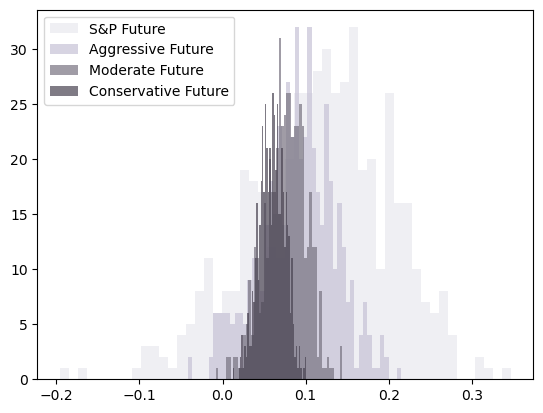

In [302]:
plt.hist(future_returns['S&P Future'], bins=50, alpha=0.7, color='#e9e9ee')
plt.hist(future_returns['Aggressive Future'], bins=50, alpha=0.7, color='#c7c2d6')
plt.hist(future_returns['Moderate Future'], bins=50, alpha=0.7, color='#787380')
plt.hist(future_returns['Conservative Future'], bins=50, alpha=0.7, color='#494351')
plt.legend(['S&P Future', 'Aggressive Future', 'Moderate Future', 'Conservative Future'])

In [303]:
def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)

def Q1(dist):
    return np.percentile(dist, 25)

def Q3(dist):
    return np.percentile(dist, 75)

def confidence_interval(dist):
  dist_avg = np.mean(dist)
  dist_std = np.std(dist)
  conf_top = ((dist_avg + (2 * dist_std))*100)
  conf_bottom = ((dist_avg - (2 * dist_std))*100)
  return round(conf_bottom,2), round(conf_top,2)

statistics = {'Return Rates': ['S&P Future', 'Aggressive Future', 'Moderate Future', 'Conservative Future'],
            'Mean': [np.mean(future_returns['S&P Future']), np.mean(future_returns['Aggressive Future']), np.mean(future_returns['Moderate Future']), np.mean(future_returns['Conservative Future'])],
            'Std Dev': [np.std(future_returns['S&P Future']), np.std(future_returns['Aggressive Future']), np.std(future_returns['Moderate Future']), np.std(future_returns['Conservative Future'])],
            'Variance': [stat.variance(future_returns['S&P Future']), stat.variance(future_returns['Aggressive Future']), stat.variance(future_returns['Moderate Future']), stat.variance(future_returns['Conservative Future'])],
            'IQR': [IQR(future_returns['S&P Future']), IQR(future_returns['Aggressive Future']), IQR(future_returns['Moderate Future']), IQR(future_returns['Conservative Future'])],
            'Q1': [Q1(future_returns['S&P Future']), Q1(future_returns['Aggressive Future']), Q1(future_returns['Moderate Future']), Q1(future_returns['Conservative Future'])],
            'Q3': [Q3(future_returns['S&P Future']), Q3(future_returns['Aggressive Future']), Q3(future_returns['Moderate Future']), Q3(future_returns['Conservative Future'])]}   
                                                                                                      
statistics_table = pd.DataFrame.from_dict(statistics).set_index('Return Rates')           
#multiply all the values in the table by 100 to get percentage values
statistics_table = (statistics_table*100).round(2)
statistics_table['95% Conf'] = [confidence_interval(future_returns['S&P Future']), confidence_interval(future_returns['Aggressive Future']), confidence_interval(future_returns['Moderate Future']), confidence_interval(future_returns['Conservative Future'])]
display(statistics_table)

#the averages below are pulled from the entire distribution of samples, as variability increases the actual return on investement will be more uncertain
#the confidence interval is calculated by taking the average return rate and adding or subtracting 2 standard deviations


,Mean,Std Dev,Variance,IQR,Q1,Q3,95% Conf
Return Rates,,,,,,,
S&P Future,11.73,8.32,0.69,11.10,6.25,17.35,"(-4.9, 28.36)"
Aggressive Future,9.02,4.45,0.20,5.84,6.24,12.07,"(0.13, 17.92)"
Moderate Future,7.56,2.44,0.06,3.28,5.99,9.27,"(2.68, 12.43)"
Conservative Future,5.95,1.52,0.02,2.19,4.87,7.06,"(2.91, 8.98)"


## A random walk through probability

The random walk theory claims that stock prices are not influenced by history, but rather a random walk that follows an upward slope. Additionally, the Black-Scholes/Merton equation explores the probability distribution of the markets in great depth, focusing on the correlation between brownian motion and the probability distrubtion found in finances.

I investigated the directions of change (derivatives) from 1928 to 2023, and found that the expected distribution resulted in 41 years with an increase in rate of return, and 52 years of decrease. Looking at the visual of my analysis, the stock market was positive for 70 of the 96 years surveyed, and negative for 26 of those years.

The goal of this retirement simulator is to simulate the same patterns found in the historical stock market to forecast the probable distribution of future returns. <br><br>

<img src="Images/StockPatterns.jpg" width="900" height="610">

### Sources:
[Random Walk](https://www.sciencedirect.com/science/article/pii/S2405473915000331) <br>
[Black-Scholes/Merton Equation](https://www.youtube.com/watch?v=A5w-dEgIU1M)

*I can calculate the motion of heavenly bodies, but not the madness of people.” — Sir Isaac Newton.*





In [304]:
future_returns.head(10)

,S&P Future,Aggressive Future,Moderate Future,Conservative Future
0,0.217121,0.059878,0.094067,0.061648
1,0.204497,0.034751,0.085678,0.066111
2,0.086068,0.090450,0.081034,0.069432
3,0.115362,0.067538,0.075868,0.069488
4,0.268350,0.009499,0.082530,0.078398
5,0.161797,-0.007756,0.108663,0.070012
6,0.098986,-0.001693,0.128526,0.078858
7,-0.014561,0.098765,0.052194,0.022405
8,0.098575,0.170560,0.084818,0.047731
9,0.169007,0.060242,0.059783,0.077474


In [305]:
#pulling the returns from the futures dataframe, preparation for the forecasting function
aggressive = {'aggressive_investor':list(future_returns['Aggressive Future'])}
aggressive_old =list(future_returns['Aggressive Future'])
moderate = {'moderate_investor': list(future_returns['Moderate Future'])}
conservative = {'conservative_investor':list(future_returns['Conservative Future'])}
nervous = {'nervous_investor':list(future_returns['Aggressive Future'])}



In [306]:
#pulling the returns from the futures dataframe, preparation for the forecasting function
aggressive = {'aggressive_investor':list(future_returns['Aggressive Future'])}
moderate = {'moderate_investor': list(future_returns['Moderate Future'])}
conservative = {'conservative_investor':list(future_returns['Conservative Future'])}
nervous = {'nervous_investor':list(future_returns['Aggressive Future'])}

#based on the rate distrinbution patterns, the negative counter function is only used for the aggressive return rates
#function to calculate the percentage of negative return rates
def negative_counter(list):
    neg_counter = 0
    for r in range(len(list)):
        if list[r] < 0:
            neg_counter += 1
    percent_negative = (neg_counter/len(list))*100
    return percent_negative

#function to calculate the percentage of positive change in the return rates
def positive_change_counter(list):
    pos_change_counter = 0
    for i in range(len(list)-1):
        if list[i] < list[i+1]:
            pos_change_counter += 1
    percent_pos_change = (pos_change_counter/len(list))*100
    return percent_pos_change

#enter the investor type (aggressive, moderate, conservative or nervous), the initial investment, and the number of years to forecast
def retirement_forecast(investor, investment, years):
    forecast_rates = list(investor.values())[0]
    investor_type = list(investor.keys())[0]
    sample_count = 0
    forecast_samples = {}
    forecast_df = [0,0]

    #require the user to enter a minimum of 10 years
    if years < 10:
        return('Please enter a forecast period of at least 10 years')
    else:
        pass
    #creating a sample that follows the same patterns of positive and negative change, as well as negative returns 
    while sample_count < 5:
        rates = random.sample(forecast_rates, years)
        negative = negative_counter(rates)
        positive_change = positive_change_counter(rates)
        if positive_change >= 40 and positive_change <= 50:
            if investor_type == 'aggressive_investor':
                if negative < 10:
                    pass
                else:
                    agg_rates = rates.copy() 
                    column_name = 'Sample ' + str(sample_count+1)
                    forecast_samples[column_name] = agg_rates
                    sample_count += 1
            #creating nervous investor, zero rates signify pulling out of the market
            if investor_type == 'nervous_investor':
                #this statement is pushing the zeroed values into my aggressive return dataframe
                if negative < 15:
                    pass
                else:
                    #if investor is nervous, replace the three consecutive returns after a negative rate with a zero
                    nervous_rates = rates.copy()
                    for i in range(len(nervous_rates)-3):
                        if nervous_rates[i] < 0:
                            nervous_rates[i+1] = 0
                            nervous_rates[i+2] = 0
                            nervous_rates[i+3] = 0
                    zero_rates = nervous_rates
                    column_name = 'Sample ' + str(sample_count+1)
                    forecast_samples[column_name] = zero_rates
                    sample_count += 1
            #conservative or moderate investor
            if investor_type == 'conservative_investor' or investor_type == 'moderate_investor':
                con_mod_rates = rates.copy()
                column_name = 'Sample ' + str(sample_count+1)
                forecast_samples[column_name] = con_mod_rates
                sample_count += 1
            else:
                pass
        else:
            pass

    #create dataframe from the dictionary
    forecast_df = pd.DataFrame(forecast_samples)
    #create  year column, starting with the current year and adding a year for each row
    forecast_df['Year'] = datetime.now().year + forecast_df.index
    forecast_df.set_index('Year', inplace=True)
    #pull in initial investment
    initial_investment = investment
    #create a new dataframe to hold the future value of the investment  
    future_value = pd.DataFrame()   
    for f in range(5):
        future_value['Sample ' + str(f+1)] = initial_investment*(1 + forecast_df['Sample ' + str(f+1)]).cumprod()
    #create a column that shows the average return for each year
    future_value['Avg. Return'] = forecast_df.mean(axis=1)
    future_value['Year'] = forecast_df.index
    future_value.set_index('Year', inplace=True)
    return future_value


In [307]:
#enter the investor type (aggressive, moderate, conservative or nervous), the initial investment, and the number of years to forecast
forecast_values = retirement_forecast(aggressive,250000,25)

#create a plot of the future values of the investment
fig = px.line(forecast_values.iloc[:, :5], title=f'Future Value of Investment Portfolio',
            #name the key for the legend
            labels={'value':'Value of Investment', 'Year':'Year'},
            width=900, height=500, markers=True)
fig.update_layout(
    legend_title="Predicted Returns"
    )
fig.show()
#print the highest and lowest investment value for the final year, in addition to the average return rate
final_year = forecast_values.index[-1]
highest_value = forecast_values.iloc[-1, :5].max()
lowest_value = forecast_values.iloc[-1, :5].min()
average_value = (highest_value + lowest_value)/2
return_forecast = (forecast_values['Avg. Return'].mean())*100
print(f'The highest projected value in {final_year} is: ${highest_value:,.0f}')
print(f'The lowest projected value in {final_year} is: ${lowest_value:,.0f}')
print(f'The average projected value in {final_year} is: ${average_value:,.0f}')
print(f'The average return rate for the portfolio is: {return_forecast:.2f}%')

The highest projected value in 2048 is: $1,993,795
The lowest projected value in 2048 is: $1,285,618
The average projected value in 2048 is: $1,639,707
The average return rate for the portfolio is: 7.94%


In [308]:
# repeat the retirement_forecast function, picking a random investor, a random initial investment from 100000 to 2000000, and a random number of years to forecast from 10 to 50
def random_forecast():
    investor_pick = random.choice([aggressive, moderate, conservative, nervous])
    investment = random.randint(100000, 2000000)
    years = random.randint(10, 50)
    random_forecast = retirement_forecast(investor_pick, investment, years)
    #get the average final value of the portfolio
    final_year = random_forecast.index[-1]
    highest_value = random_forecast.iloc[-1, :5].max()
    lowest_value = random_forecast.iloc[-1, :5].min()
    average_value = round((highest_value + lowest_value)/2)
    #create a new list to hold the number of years forecasted, the investor type, and the highest average value
    

    forecast_list = [list(investor_pick.keys())[0], years, investment, average_value]
    return  forecast_list


#this commented out section was used to generate a large csv file of random forecasts to be used in a machine learning model
# print(random_forecast())

#the random_forecast function was run 10,000 times to create a dataframe of the results for my machine learning model
# forecast_results = []
# for i in range(10000):
#     forecast_results.append(random_forecast())
# forecast_df = pd.DataFrame(forecast_results, columns=['Investor Type', 'Years Forecasted', 'Initial Investment', 'Final Value'])
# forecast_df.to_csv('Data/forecast_results.csv')
# forecast_df.head()


### Learning from the Past:
The retirement forecast function was utilized to generate 10,000 hypothetical investment scenarios.  Initial investment values were randomly generated, ranging from $100,000 to $2,000,000, with a range of investment years from 10-50. The hypothetical dataset was saved as a CSV and then utilized for machine learning.

*Modeling:* Linear regression, ridge regression, and KNN were the machine learning models tested. A grid search was set up to optimize the parameters for each model.
*Cross-validation:* After assessing the model performance, the KNN model proved to be the best predictor of retirement values. The KNN model was implemented for creating predictions.

In [309]:
#importing functions for the machine learning model
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
import warnings
# Suppress UserWarning from scikit-learn
warnings.filterwarnings("ignore", category=UserWarning)

In [310]:
#convert the forecast_results csv file into a dataframe
forecast_results = pd.read_csv('Data/forecast_results.csv')
forecast_results.drop('Unnamed: 0', axis=1, inplace=True)
forecast_results.head()

#converting the investor type into a numerical value
forecast_results_num = pd.get_dummies(forecast_results, columns=['Investor Type'])


In [311]:
#splitting the data into training and testing sets
X = forecast_results_num.drop('Final Value', axis=1)
y = forecast_results_num['Final Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression pipeline
lr_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

# print(lr_pipe.get_params()) --> saving this code to remind myself how to look up the parameters for the grid search
lr_grid = GridSearchCV(estimator=lr_pipe, n_jobs=-1, param_grid={'regression__fit_intercept': [True, False], 'scaler__with_mean': [True, False], 'scaler__with_std': [True, False]})
lin_reg = lr_grid.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

#ridge regression pipeline
rr_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', Ridge())])
rr_grid = GridSearchCV(estimator=rr_pipe, n_jobs=-1, param_grid={'regression__alpha': [0.1, 1, 10, 100, 1000]})
rr_grid = rr_grid.fit(X_train, y_train)
y_pred_ridge = rr_grid.predict(X_test)

#knn pipeline
k_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', KNeighborsRegressor())])
k_grid = GridSearchCV(estimator=k_pipe, n_jobs=-1, param_grid={'regression__n_neighbors': [3, 5, 7, 9, 11], 'regression__metric': ['euclidean', 'minkowski','manhattan'], 'regression__weights': ['uniform', 'distance']})
k_grid = k_grid.fit(X_train, y_train)
k_pred = k_grid.predict(X_test)


#evaluating the model metrics
model_evaluation = pd.DataFrame({'Linear Regression': [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)],
                                'Ridge Regression': [metrics.mean_absolute_error(y_test, y_pred_ridge), metrics.mean_squared_error(y_test, y_pred_ridge), np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)), metrics.r2_score(y_test,y_pred_ridge)],
                                'KNN': [metrics.mean_absolute_error(y_test, k_pred), metrics.mean_squared_error(y_test, k_pred), np.sqrt(metrics.mean_squared_error(y_test, k_pred)), metrics.r2_score(y_test, k_pred)]},
                               index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'])
model_evaluation

,Linear Regression,Ridge Regression,KNN
Mean Absolute Error,5.376497e+06,5.372758e+06,9.156533e+05
Mean Squared Error,6.545493e+13,6.545089e+13,4.740012e+12
Root Mean Squared Error,8.090422e+06,8.090172e+06,2.177157e+06
R2 Score,6.253626e-01,6.253857e-01,9.728701e-01


In [312]:
#using cross validation to determine the best model
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lr_scores = cross_val_score(lin_reg, X, y, cv=cv, scoring='r2')
rr_scores = cross_val_score(rr_grid, X, y, cv=cv, scoring='r2')
k_scores = cross_val_score(k_grid, X, y, cv=cv, scoring='r2')
cv_scores = pd.DataFrame({'Linear Regression': lr_scores, 'Ridge Regression': rr_scores, 'KNN': k_scores})
cv_scores.mean()



Linear Regression    0.633875
Ridge Regression     0.633874
KNN                  0.973600
dtype: float64

In [313]:
#using KNN to make retirement predictions as this is the best model
# ['Years Forecasted', 'Initial Investment', 'Investor Type_aggressive_investor', 'Investor Type_conservative_investor', 'Investor Type_moderate_investor', 'Investor Type_nervous_investor']
# Aggressive Investor - Conservative - Moderate - Nervous
pred_inputs = [[40, 750000, 1,0,0,0]]
prediction = k_grid.predict(pred_inputs)

print(f'The predicted final value of the portfolio is: ${prediction[0]:,.0f}')

The predicted final value of the portfolio is: $19,813,910


Text(0.5, 1.0, 'Years Invested vs Final Portfolio Value by Investor Type')

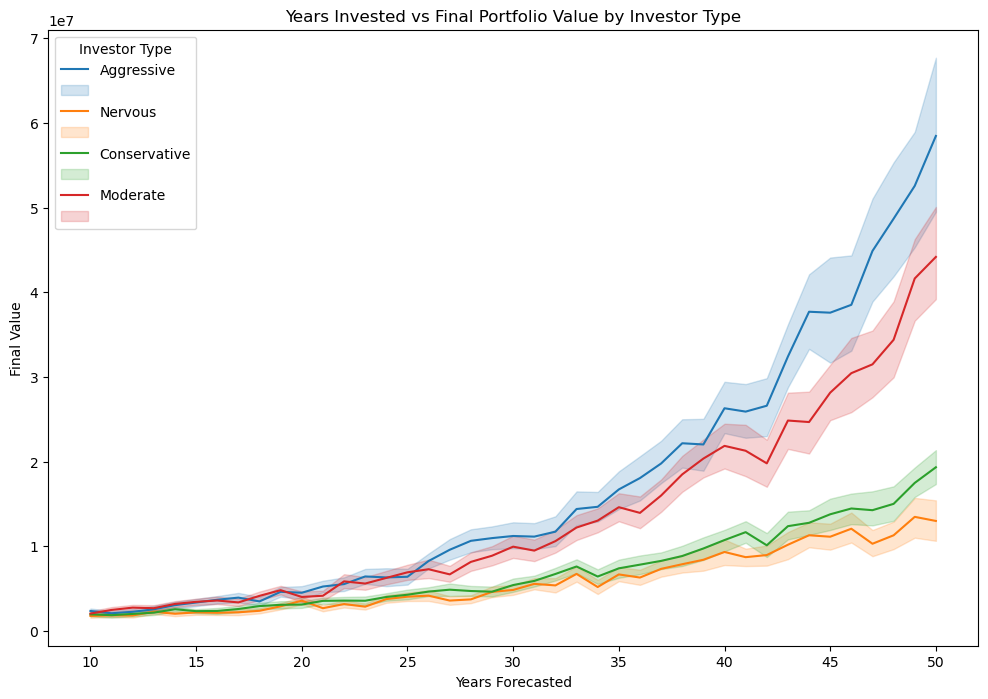

In [314]:
#lineplot of the original forecast data to show affect of investor type on final value
fig, ax = plt.subplots(figsize=(12,8))
forecast_plot = sns.lineplot(data=forecast_results, x='Years Forecasted', y='Final Value', hue='Investor Type')
plt.legend(title='Investor Type', loc='upper left', labels=['Aggressive', '', 'Nervous', '','Conservative','', 'Moderate',''])
plt.title('Years Invested vs Final Portfolio Value by Investor Type')